In [1]:
import os
import numpy as np
import pandas as pd

import joblib
import sys
sys.path.append('..')
from utils import get_config
from ensemble import read_features, load_independent_data

In [3]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14.0, 
    'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'figure.figsize':(8,6)}
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style='ticks',rc=rc)

In [5]:
chr = '21'
data_root_dir = get_config()['data_dir']['data_root_dir']

In [6]:
ens_model_fname = os.path.join(data_root_dir, 
                               'model_update/ensemble_model_chr{}.pkl'.format(chr))
ens_model = joblib.load(ens_model_fname)

# predict on test dataset

In [7]:
# read test 
_, test_df = read_features(reload=True, chr=chr)
# fp_df = load_independent_data(seq_type='fp', chr='21', reload=True)
# fp_df.loc[:,'LABEL'] = 0
# fp_df = fp_df[list(test_df_.columns)]

# fn_df = load_independent_data(seq_type='fn', chr='21', reload=True)
# fn_df.loc[:,'LABEL'] = 1
# fn_df = fn_df[list(test_df_.columns)]
# # # use_col = ['SEQ_F_0', 'SEQ_F_1', 'SEQ_F_2', 'SEQ_F_3', 'SEQ_F_4', 'SEQ_F_5', 'SEQ_F_6',
# # #      'SEQ_F_7', 'Sample_id', 'LABEL']
# # # test_df = test_df_[use_col].copy()
# test_df = pd.concat([test_df_, fp_df, fn_df], ignore_index=True)

In [8]:
test_df.head()

,AGE,HEIGHT,WEIGHT,GESTATIONAL_WEEKS_D,FF,BMI,LABEL,SEQ_F_0,SEQ_F_1,SEQ_F_2,SEQ_F_3,SEQ_F_4,SEQ_F_5,SEQ_F_6,SEQ_F_7,Sample_id
0,-0.825061,-1.893544,-0.097801,1.184232,0.463979,0.666091,1,-0.978409,-1.574606,1.527259,1.284538,0.611944,-0.824956,1.060096,-1.306827,17B4487652
1,-0.142109,0.022015,0.272161,0.772670,0.205807,0.296246,1,-1.273888,-1.310434,1.725421,1.107274,1.486313,-0.219594,1.966216,-1.210229,18B2676665
2,0.973694,0.022015,0.730668,-1.439478,0.197158,0.794199,1,-1.402076,-0.756952,0.532459,-0.342890,0.932986,-0.264235,0.461367,-0.300581,17B1209425
3,-1.105778,1.348893,-0.546154,0.772670,2.275303,-1.011085,1,-1.534604,-1.538409,1.986762,0.825670,2.254098,-0.454051,2.030720,-1.482961,18B2434305
4,1.973631,0.301207,0.455564,0.927006,-0.601678,0.383945,1,-1.300929,-0.725609,0.303036,-0.001922,0.300267,-1.435191,0.008830,-1.002342,18B2561586


In [9]:
print('test data size: {}'.format(test_df.shape))
test_df.head()

test data size: (281, 16)


,AGE,HEIGHT,WEIGHT,GESTATIONAL_WEEKS_D,FF,BMI,LABEL,SEQ_F_0,SEQ_F_1,SEQ_F_2,SEQ_F_3,SEQ_F_4,SEQ_F_5,SEQ_F_6,SEQ_F_7,Sample_id
0,-0.825061,-1.893544,-0.097801,1.184232,0.463979,0.666091,1,-0.978409,-1.574606,1.527259,1.284538,0.611944,-0.824956,1.060096,-1.306827,17B4487652
1,-0.142109,0.022015,0.272161,0.772670,0.205807,0.296246,1,-1.273888,-1.310434,1.725421,1.107274,1.486313,-0.219594,1.966216,-1.210229,18B2676665
2,0.973694,0.022015,0.730668,-1.439478,0.197158,0.794199,1,-1.402076,-0.756952,0.532459,-0.342890,0.932986,-0.264235,0.461367,-0.300581,17B1209425
3,-1.105778,1.348893,-0.546154,0.772670,2.275303,-1.011085,1,-1.534604,-1.538409,1.986762,0.825670,2.254098,-0.454051,2.030720,-1.482961,18B2434305
4,1.973631,0.301207,0.455564,0.927006,-0.601678,0.383945,1,-1.300929,-0.725609,0.303036,-0.001922,0.300267,-1.435191,0.008830,-1.002342,18B2561586


In [10]:
test_label = test_df['LABEL'].values
test_sample_id = test_df['Sample_id'].values
test_arr = test_df.drop(columns=['LABEL', 'Sample_id']).values
print(test_arr[:5,:])


[[-8.25061000e-01 -1.89354355e+00 -9.78006601e-02  1.18423221e+00
   4.63978768e-01  6.66091152e-01 -9.78409333e-01 -1.57460636e+00
   1.52725907e+00  1.28453800e+00  6.11943680e-01 -8.24956284e-01
   1.06009603e+00 -1.30682691e+00]
 [-1.42108546e-01  2.20146814e-02  2.72160508e-01  7.72669835e-01
   2.05806682e-01  2.96246464e-01 -1.27388849e+00 -1.31043352e+00
   1.72542139e+00  1.10727449e+00  1.48631264e+00 -2.19593834e-01
   1.96621587e+00 -1.21022875e+00]
 [ 9.73694464e-01  2.20146814e-02  7.30668428e-01 -1.43947791e+00
   1.97157521e-01  7.94199142e-01 -1.40207567e+00 -7.56951584e-01
   5.32459275e-01 -3.42889627e-01  9.32986380e-01 -2.64235254e-01
   4.61367148e-01 -3.00580811e-01]
 [-1.10577801e+00  1.34889332e+00 -5.46154207e-01  7.72669835e-01
   2.27530344e+00 -1.01108453e+00 -1.53460356e+00 -1.53840878e+00
   1.98676179e+00  8.25670485e-01  2.25409843e+00 -4.54051123e-01
   2.03072030e+00 -1.48296077e+00]
 [ 1.97363106e+00  3.01207495e-01  4.55563676e-01  9.27005724e-01
  

In [11]:
test_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

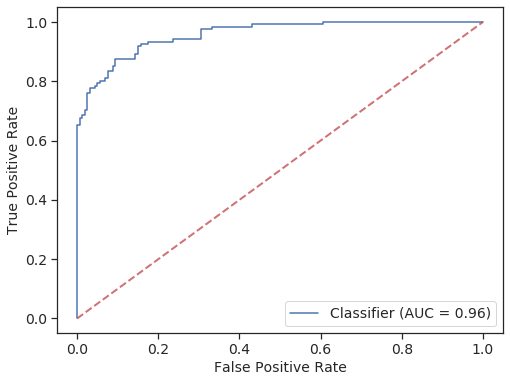

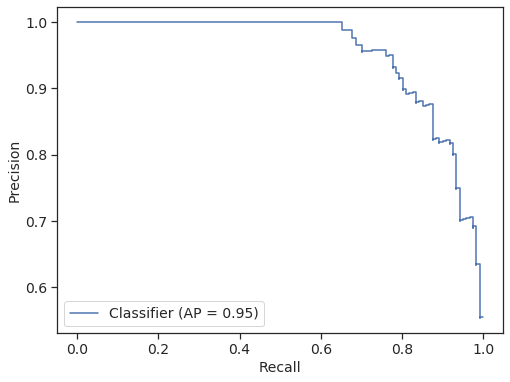

In [12]:

fig, ax = plt.subplots()
clf_disp = plot_roc_curve(ens_model, test_arr, test_label, name='Classifier', ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

fig, ax = plt.subplots()
disp = plot_precision_recall_curve(ens_model, test_arr, test_label, name='Classifier', ax=ax)
# disp.ax_.set_title('AP={0:0.2f}'.format(average_precision))


# Adjust the decision threshold to identify the operating point

In [14]:
y_pred_prob = ens_model.predict_proba(test_arr)
p, r, thresholds = precision_recall_curve(test_label, y_pred_prob[:,1])

In [34]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_pred_prob[:,1], t)
    
    print('precision_score: {}'.format(precision_score(test_label, y_pred_adj)))
    print('recall_score: {}'.format(recall_score(test_label, y_pred_adj)))
    
    cm = confusion_matrix(test_label, y_pred_adj)
    print(pd.DataFrame(cm,
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    plot_confusion_matrix(cm, ['neg', 'pos'], title='')
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

precision_score: 0.8928571428571429
recall_score: 0.8264462809917356
     pred_neg  pred_pos
neg       148        12
pos        21       100
Confusion matrix, without normalization
[[148  12]
 [ 21 100]]


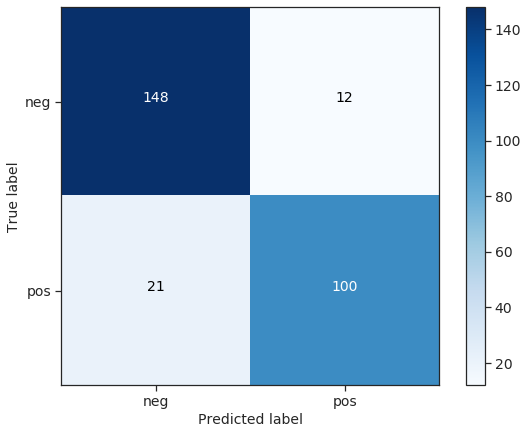

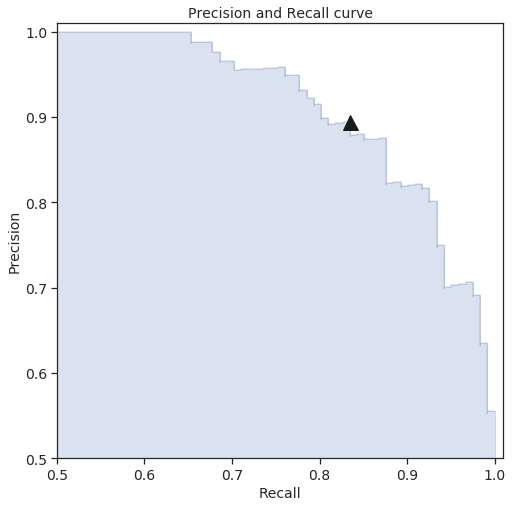

In [53]:
precision_recall_threshold(p, r, thresholds, 0.5)

precision_score: 0.703030303030303
recall_score: 0.9586776859504132
     pred_neg  pred_pos
neg       111        49
pos         5       116
Confusion matrix, without normalization
[[111  49]
 [  5 116]]


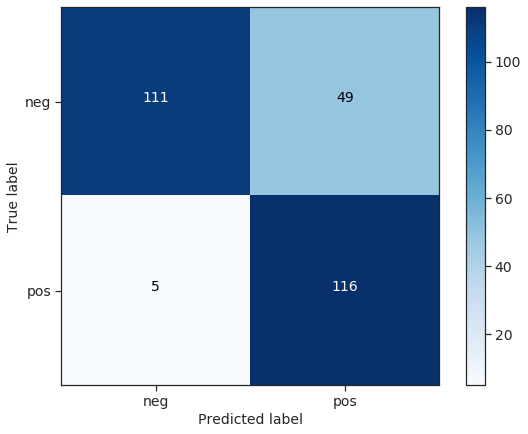

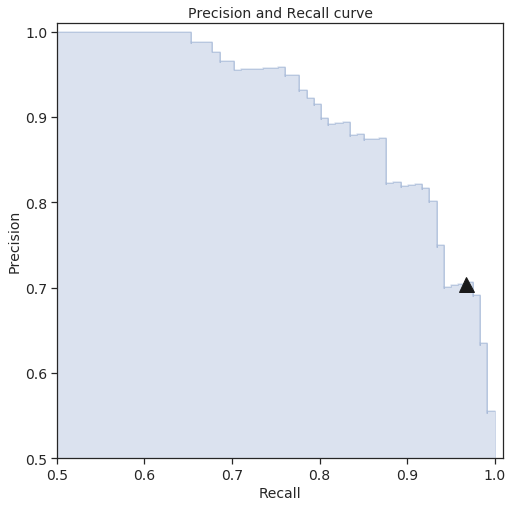

In [54]:
precision_recall_threshold(p, r, thresholds, 0.10)
 

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

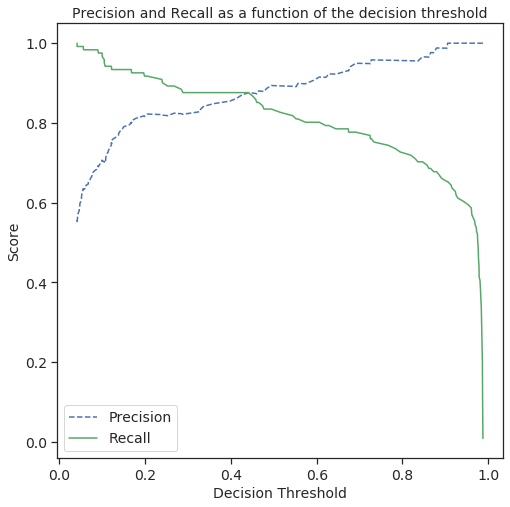

In [46]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# read fp dataset

In [55]:
fp_df = load_independent_data(seq_type='fp', chr='21', reload=True)

In [56]:
print('fp data size: {}'.format(fp_df.shape))
fp_df.head()

fp data size: (130, 15)


,AGE,HEIGHT,WEIGHT,GESTATIONAL_WEEKS_D,FF,BMI,SEQ_F_0,SEQ_F_1,SEQ_F_2,SEQ_F_3,SEQ_F_4,SEQ_F_5,SEQ_F_6,SEQ_F_7,Sample_id
0,0.051944,0.022015,-0.644855,0.412553,-0.126836,-0.699659,-0.941358,-0.939944,-0.689436,-1.050349,-0.348207,-0.032607,-0.270727,0.329309,18B2567429
1,-0.701659,-0.962519,-0.214029,-0.719244,-0.142072,0.138403,0.042459,0.596319,-0.568290,-0.338557,-0.284406,-0.789343,-0.531346,-0.390685,18B2475907
2,0.526714,0.046735,0.051525,-0.564908,-0.116679,0.047328,-0.648337,-0.449760,-0.256306,-0.274244,-0.381344,-0.505431,-0.493974,-0.985304,17B5136086D
3,-1.095416,-0.174892,-1.103363,0.258217,0.587081,-1.138549,-0.271766,-1.109357,-0.783206,-0.443656,-0.357484,-0.462048,-0.706117,0.094431,17B4507789
4,0.712289,-1.947052,0.501414,-0.153345,-1.440395,1.430251,0.807159,0.108794,-0.714574,-0.025265,0.047264,0.041070,0.257231,0.432672,18B4480690


In [57]:
fp_sample_id = fp_df['Sample_id'].values
fp_arr = fp_df.drop(columns=['Sample_id']).values
print(fp_arr[:5,:])

[[ 0.05194415  0.02201468 -0.64485533  0.41255276 -0.12683635 -0.69965889
  -0.94135825 -0.9399445  -0.68943588 -1.05034937 -0.34820728 -0.03260739
  -0.27072689  0.32930893]
 [-0.70165856 -0.96251877 -0.21402947 -0.71924376 -0.14207191  0.13840261
   0.04245867  0.59631912 -0.56829036 -0.33855704 -0.28440638 -0.78934259
  -0.53134617 -0.39068516]
 [ 0.52671386  0.04673507  0.05152543 -0.56490787 -0.11667932  0.04732765
  -0.64833652 -0.44975966 -0.25630639 -0.27424404 -0.38134378 -0.50543052
  -0.49397378 -0.98530405]
 [-1.09541597 -0.17489201 -1.10336325  0.25821687  0.58708052 -1.138549
  -0.27176591 -1.10935686 -0.78320573 -0.44365641 -0.35748366 -0.462048
  -0.70611668  0.09443121]
 [ 0.71228852 -1.94705221  0.50141447 -0.1533455  -1.44039546  1.4302507
   0.80715908  0.1087941  -0.71457441 -0.02526456  0.04726368  0.0410704
   0.25723112  0.43267242]]


In [58]:
fp_pred_prob = ens_model.predict_proba(fp_arr)
fp_pred_label = ens_model.predict(fp_arr)
print(fp_pred_label)

[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1]


In [62]:
fp_pred_adj = np.array(adjusted_classes(fp_pred_prob[:,1], 0.1))

In [63]:
len(fp_pred_adj[fp_pred_adj==1]), len(fp_pred_adj[fp_pred_adj==0])

(98, 32)

In [70]:
len(fp_pred_adj[fp_pred_adj==1])/fp_df.shape[0], len(fp_pred_adj[fp_pred_adj==0])/fp_df.shape[0]

(0.7538461538461538, 0.24615384615384617)

# read fn dataset

In [64]:
fn_df = load_independent_data(seq_type='fn', chr='21', reload=True)
print('fp data size: {}'.format(fn_df.shape))
fn_df.head()

fp data size: (17, 15)


,AGE,HEIGHT,WEIGHT,GESTATIONAL_WEEKS_D,FF,BMI,SEQ_F_0,SEQ_F_1,SEQ_F_2,SEQ_F_3,SEQ_F_4,SEQ_F_5,SEQ_F_6,SEQ_F_7,Sample_id
0,0.163101,-0.765612,-0.644855,0.412553,0.723816,-0.430679,0.526115,1.036290,-1.327459,-1.246246,-1.062721,0.471350,-0.389387,0.059687,18B4304934
1,0.048647,-1.725768,-1.363271,-1.439478,-0.804819,-0.948018,1.013186,0.485530,0.258208,-0.296549,-0.535923,0.851792,-0.111873,0.382873,18B2720999
2,-0.278228,-0.492215,-0.736557,0.258217,0.248286,-0.629296,0.462343,0.634260,-0.562540,-1.037278,-0.630509,0.648083,-0.815498,0.124375,17B4711411
3,0.537076,-0.765612,-1.533063,-1.439478,-0.136993,-1.445400,-1.010010,1.258861,-0.880885,-0.412208,0.204002,-0.326578,-0.151507,0.661942,18B3453965
4,-0.590502,1.599783,0.946009,-0.873580,-0.147150,0.385018,0.353325,-0.125217,-0.291080,-0.003462,-0.389715,-0.295984,-0.379031,0.101176,18B3547618


In [65]:
fn_sample_id = fn_df['Sample_id'].values
fn_arr = fn_df.drop(columns=['Sample_id']).values
print(fn_arr[:5,:])

[[ 0.16310055 -0.76561208 -0.64485533  0.41255276  0.72381569 -0.43067933
   0.52611471  1.03628961 -1.32745902 -1.24624559 -1.06272142  0.47134967
  -0.38938652  0.05968679]
 [ 0.04864714 -1.72576752 -1.36327071 -1.43947791 -0.80481873 -0.94801796
   1.01318629  0.48552983  0.25820836 -0.29654937 -0.53592341  0.85179206
  -0.11187276  0.38287311]
 [-0.27822804 -0.49221549 -0.73655691  0.25821687  0.24828571 -0.6292957
   0.46234271  0.63426039 -0.56253953 -1.03727797 -0.63050886  0.64808341
  -0.81549817  0.12437523]
 [ 0.53707589 -0.76561208 -1.53306276 -1.43947791 -0.13699339 -1.44539975
  -1.01001028  1.25886087 -0.88088523 -0.41220834  0.20400239 -0.32657781
  -0.15150689  0.66194237]
 [-0.59050216  1.59978316  0.94600857 -0.87357965 -0.14715043  0.38501775
   0.35332472 -0.12521729 -0.29108003 -0.00346207 -0.38971544 -0.29598448
  -0.37903118  0.10117571]]


In [66]:
fn_pred_prob = ens_model.predict_proba(fn_arr)
fn_pred_label = ens_model.predict(fn_arr)
print(fn_pred_label)

[0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0]


In [67]:
fn_pred_adj = np.array(adjusted_classes(fn_pred_prob[:,1], 0.1))

In [68]:
len(fn_pred_adj[fn_pred_adj==1]), len(fn_pred_adj[fn_pred_adj==0])

(11, 6)

In [69]:
len(fn_pred_adj[fn_pred_adj==1])/fn_df.shape[0], len(fn_pred_adj[fn_pred_adj==0])/fn_df.shape[0]

(0.6470588235294118, 0.35294117647058826)